In [1]:
import re

# Charger le fichier
with open("log_text.txt", "r", encoding="utf-8") as f:
    log_file = f.read()

# Définir la regex
pattern = re.compile(r"Count\s+(\d+)\s+ext_offset\s+(\d+)\s+Width\s+([\d.]+)\s+Offset\s+(-?[\d.]+)")

# Appliquer la regex
matches = pattern.findall(log_file)

# Afficher les résultats
for count, ext_offset, width, offset in matches:
    print(f"Count: {count}, ext_offset: {ext_offset}, Width: {width}, Offset: {offset}")



Count: 01, ext_offset: 01, Width: 38.00, Offset: -40.00
Count: 01, ext_offset: 01, Width: 37.40, Offset: -39.60
Count: 01, ext_offset: 01, Width: 37.60, Offset: -38.40
Count: 01, ext_offset: 01, Width: 37.00, Offset: -38.00
Count: 01, ext_offset: 01, Width: 37.60, Offset: -37.60
Count: 01, ext_offset: 01, Width: 37.40, Offset: -37.40
Count: 01, ext_offset: 01, Width: 38.40, Offset: -37.40
Count: 01, ext_offset: 01, Width: 38.80, Offset: -37.20
Count: 02, ext_offset: 01, Width: 37.80, Offset: -37.00
Count: 01, ext_offset: 01, Width: 37.00, Offset: -36.60
Count: 01, ext_offset: 01, Width: 38.80, Offset: -36.60
Count: 01, ext_offset: 01, Width: 37.60, Offset: -36.40
Count: 01, ext_offset: 01, Width: 38.00, Offset: -36.40
Count: 01, ext_offset: 01, Width: 38.00, Offset: -36.20
Count: 01, ext_offset: 01, Width: 37.60, Offset: -35.80
Count: 01, ext_offset: 01, Width: 37.40, Offset: -35.60
Count: 01, ext_offset: 01, Width: 37.60, Offset: -35.40
Count: 01, ext_offset: 01, Width: 37.80, Offset:

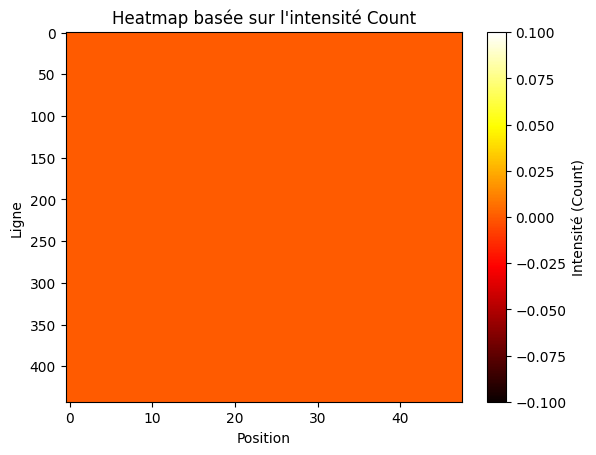

In [3]:
import re
import numpy as np
import matplotlib.pyplot as plt

# Lire le fichier
with open("log_text.txt", "r", encoding="utf-8") as f:
    lines = f.readlines()

# Regex
meta_pattern = re.compile(r"Count\s+(\d+)\s+ext_offset\s+(\d+)\s+Width\s+([\d.]+)\s+Offset\s+(-?[\d.]+)")

heatmap_data = []
current_data_line = ""

for line in lines:
    line = line.strip()
    
    if not line:
        continue
    
    match = meta_pattern.match(line)
    
    if match and current_data_line:
        count = int(match.group(1))
        binary_line = [1 if c == 'X' else 0 for c in current_data_line]
        weighted_line = [count * b for b in binary_line]
        heatmap_data.append(weighted_line)
        current_data_line = ""
    
    elif "*" not in line:
        current_data_line = line

# ⚠ Normaliser les longueurs
max_len = max(len(row) for row in heatmap_data)
heatmap_data = [row + [0] * (max_len - len(row)) for row in heatmap_data]

# Convertir en array numpy
heatmap_array = np.array(heatmap_data)

# Afficher la heatmap
plt.imshow(heatmap_array, cmap='hot', interpolation='nearest', aspect='auto')
plt.title("Heatmap basée sur l'intensité Count")
plt.xlabel("Position")
plt.ylabel("Ligne")
plt.colorbar(label="Intensité (Count)")
plt.show()
